In [1]:
import pandas as pd
import numpy as np


In [2]:
data= pd.read_csv(r"C:\Users\Admin\Downloads\HousePricePrediction.csv")

In [3]:
# exploratory data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dated          4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
#from the above there is no need to rescale our data. hence we there are any na/ null
data.isna().sum().sum()


0

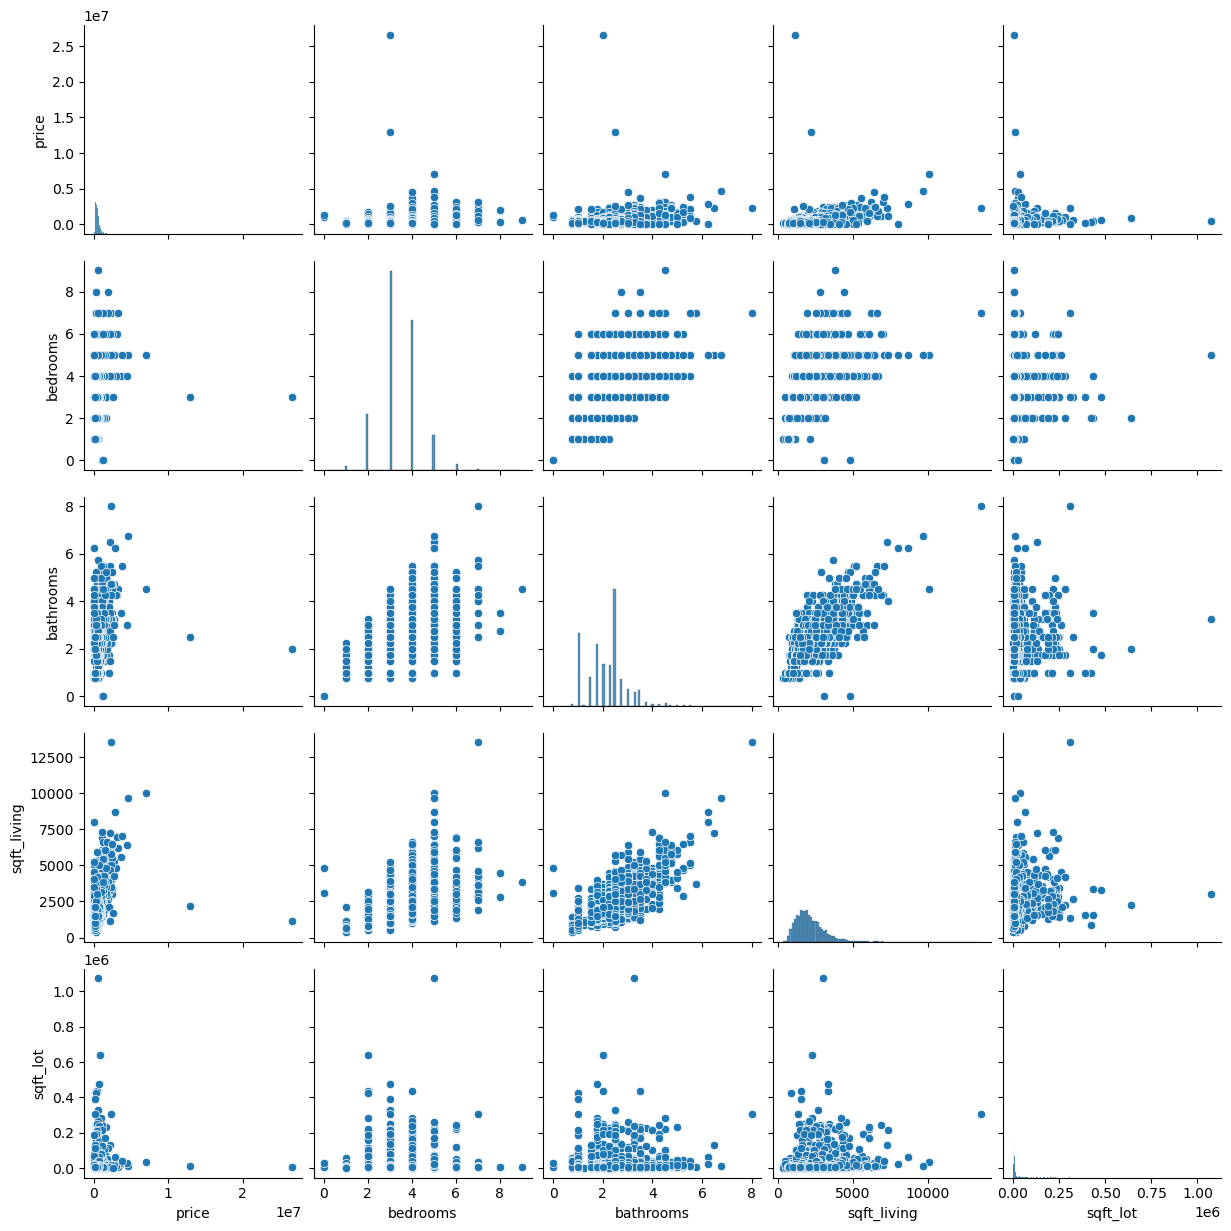

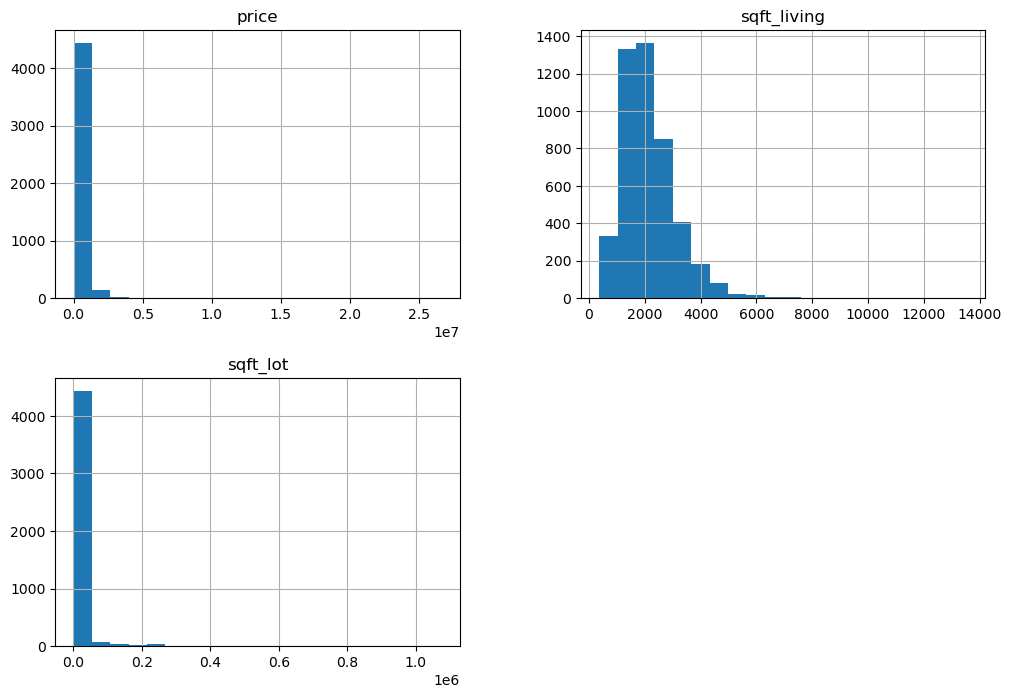

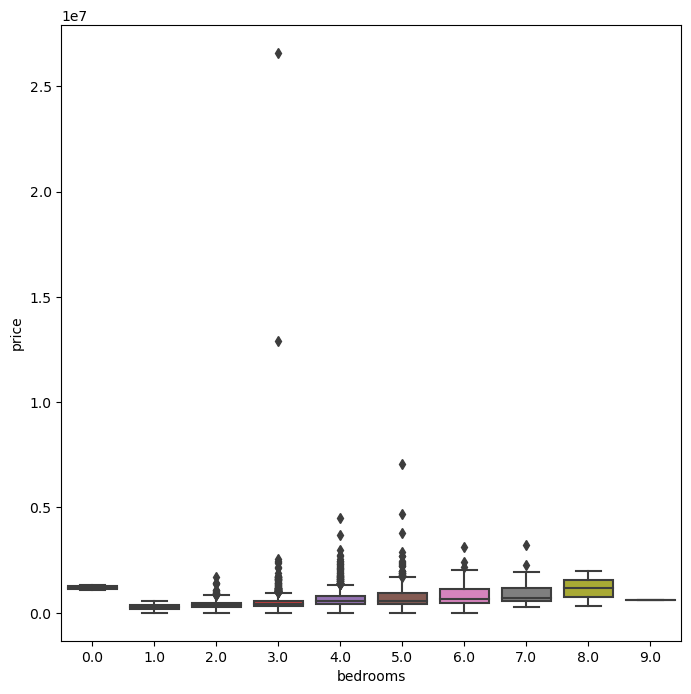

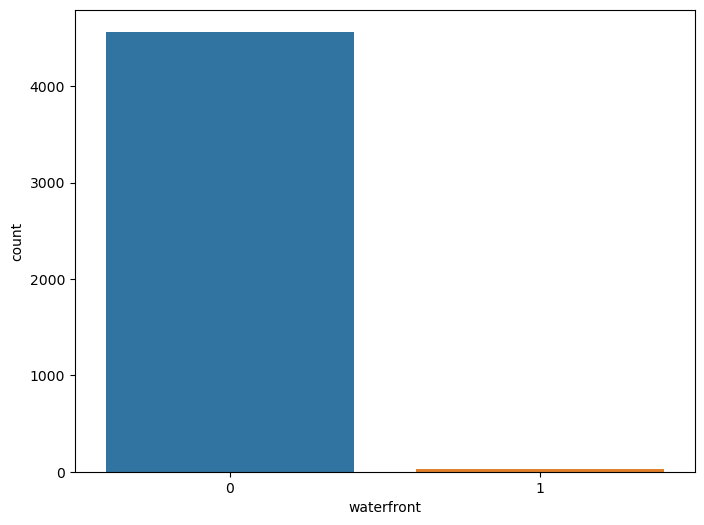

In [100]:
import seaborn as sns
from matplotlib import pyplot as plt
# Pairplot to visualize relationships between numeric features
sns.pairplot(data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
plt.show()

# Histograms for numeric features
data[['price', 'sqft_living', 'sqft_lot']].hist(bins=20, figsize=(12, 8))
plt.show()

# Boxplots to visualize the distribution of numeric features
plt.figure(figsize=(8, 8))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.show()

# Countplot for categorical features like 'waterfront' and 'view'
plt.figure(figsize=(8, 6))
sns.countplot(x='waterfront', data=data)
plt.show()


In [11]:
#feature engineering
#getting the actual age of the of the houses i.e this 2023
data["actual_age"]= 2023- data["yr_built"]

#age of renovation (from year of last renovation date i.e 2023)
data["age_of_renovation"]= 2023- data["yr_renovated"]

data.head()



,dated,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,actual_age,age_of_renovation
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,68,18
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,102,2023
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,57,2023
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,60,2023
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,47,31


In [12]:
#we we actual ages and age of renovation greater than 100

# Create a boolean mask for values greater than 100
mask = data['age_of_renovation'] > 100
# Replace values greater than 100 with 0
data.loc[mask, 'age_of_renovation'] = 0

# Create a boolean mask for values greater than 100
mask_1 = data['actual_age'] > 100
# Replace values greater than 100 with 0
data.loc[mask_1, 'actual_age'] = 0


In [13]:
# dropping the yr_renovated, and yr_built column to make the new columns to be independeent
data= data.drop(["yr_built","yr_renovated"], axis=1)

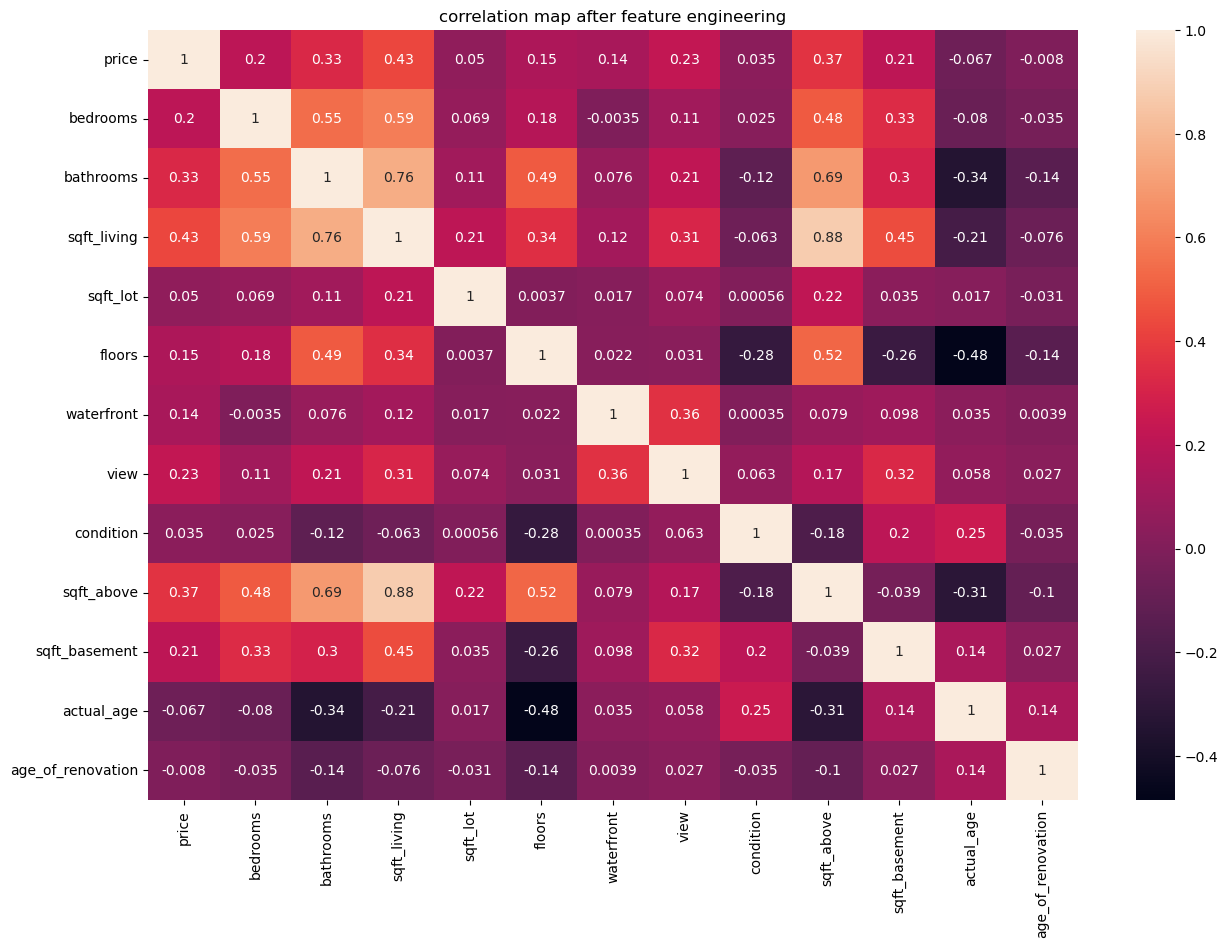

In [14]:
# #checking for the relationship between the variables after feature engineering
correlation_matrix_2= data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_2, annot= True)
plt.title("correlation map after feature engineering")
plt.show()


In [15]:
#dropping dated, street columns
data=data.drop(["dated","street"], axis=1)


In [16]:
#getting dummies variables for city, statezip, country
data= pd.get_dummies(data, columns=["city",  "statezip", "country"])
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98166,statezip_WA 98168,statezip_WA 98177,statezip_WA 98178,statezip_WA 98188,statezip_WA 98198,statezip_WA 98199,statezip_WA 98288,statezip_WA 98354,country_USA
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,1
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,1
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,1


In [17]:
#model building, we shall the linear regression model since our response variable is continous
# defining our y_variables and x_variables
x= data.drop(['price'],axis=1)
y= data["price"]

In [19]:
#training the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=30, random_state=42)


In [34]:
models= {
    "lr":LinearRegression(),
    "Lasso": Lasso(), 
    "Ridge": Ridge()
}


for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE = {mse:.4F}, R2 = {r2:.4F}")


lr: MSE = 30538668342.9217, R2 = 0.8263
Lasso: MSE = 30539502412.2640, R2 = 0.8263
Ridge: MSE = 31081593383.6805, R2 = 0.8232


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.874e+14, tolerance: 1.457e+11
  model = cd_fast.enet_coordinate_descent(


Both Linear Regression and Lasso Regression have quite similar performance based
on MSE and R-squared values,The Linear Regression might be marginally better due
to its slightly lower MSE so we make use of the Linear Regression

fitting the linear model so that we can extract the model summary to draw conclusions and validate the assumptions linear models.

In [39]:
import statsmodels.api as sm
clf=LinearRegression()
model=sm.OLS(y_train,x_train).fit()
predictions=model.predict(x_test)
print(predictions)

3683    4.762753e+05
4411    2.512035e+05
2584    1.246697e+06
69      4.252751e+05
1844    1.766651e+05
33      6.221379e+05
3085    4.830776e+05
4034    7.140474e+05
4469    5.089637e+05
4578    8.079968e+05
3518    5.925905e+05
3710    5.473638e+05
3134    8.448636e+05
1393    2.653784e+05
1589    1.615541e+05
2264    9.178738e+05
937     6.170598e+05
240     5.247782e+05
1010    1.199442e+06
2471    8.265941e+05
3153    1.468361e+06
23      5.693063e+05
26      6.137934e+05
2475    5.544082e+05
538     2.825186e+05
4425    6.106688e+04
530     7.324485e+05
4527    1.094284e+06
1611    4.254906e+05
297     8.538970e+05
dtype: float64


In [58]:
# Residuals Analysis
residual= y_test - predictions 
residual

252     1.320460e+06
1807    4.697550e+04
2005    1.464486e+05
3165    6.401073e+04
4257    9.951440e+04
            ...     
4426    4.511754e+04
466     1.668165e+05
3092    1.444833e+04
3772   -1.130555e+05
860    -1.775112e+04
Length: 4570, dtype: float64

In [64]:
results=model.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     18.56
Date:                Thu, 04 Jan 2024   Prob (F-statistic):          9.62e-273
Time:                        15:05:14   Log-Likelihood:                -66181.
No. Observations:                4570   AIC:                         1.326e+05
Df Residuals:                    4464   BIC:                         1.333e+05
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
bedrooms                 -2.714e+04   1.03e+04     -2.631      0.009   -4.74e+04   -6915.224
bathrooms                 2.352e+04   1.59e+04      1.477      0.140   -7695.057    5.47e+04
sqft_living                127.6086      9.797     13.026      0.000     108.402     146.815
sqft_lot                     0.0440      0.223      0.197      0.844      -0.394       0.482
floors                   -6.659e+04   2.02e+04     -3.297      0.001   -1.06e+05    -2.7e+04
waterfront                4.749e+05   9.39e+04      5.060      0.000    2.91e+05    6.59e+05
view                      5.068e+04    1.1e+04      4.609      0.000    2.91e+04    7.22e+04
condition                 2.676e+04   1.16e+04      2.315      0.021    4098.994    4.94e+04
sqft_above                 115.0893     10.461     11.001      0.000      94.580     135.599
sqft_basement               12.5194     13.964      0.897      0.370     -14.857      39.896
actual_age                -172.3703    330.709     -0.521      0.602    -820.725     475.984
age_of_renovation           62.7453    424.176      0.148      0.882    -768.850     894.340
city_Algona              -1.124e+05   2.02e+05     -0.555      0.579   -5.09e+05    2.85e+05
city_Auburn              -9.019e+04   9.61e+04     -0.939      0.348   -2.79e+05    9.81e+04
city_Beaux Arts Village  -8.998e+04   4.22e+05     -0.213      0.831   -9.17e+05    7.37e+05
city_Bellevue             1.525e+05   7.63e+04      1.998      0.046    2836.898    3.02e+05
city_Black Diamond       -6.156e+04   7.91e+04     -0.779      0.436   -2.17e+05    9.35e+04
city_Bothell             -5738.2420    2.4e+05     -0.024      0.981   -4.77e+05    4.65e+05
city_Burien               2.953e+04   9.24e+04      0.320      0.749   -1.52e+05    2.11e+05
city_Carnation           -4.443e+04   5.18e+04     -0.858      0.391   -1.46e+05    5.71e+04
city_Clyde Hill           3.914e+04   1.48e+05      0.265      0.791   -2.51e+05    3.29e+05
city_Covington           -2.361e+04   7.79e+04     -0.303      0.762   -1.76e+05    1.29e+05
city_Des Moines           1.034e+05    1.9e+05      0.545      0.586   -2.68e+05    4.75e+05
city_Duvall              -5.529e+04   3.85e+04     -1.437      0.151   -1.31e+05    2.02e+04
city_Enumclaw            -1.125e+05   4.69e+04     -2.398      0.017   -2.04e+05   -2.05e+04
city_Fall City           -8857.3344   7.22e+04     -0.123      0.902    -1.5e+05    1.33e+05
city_Federal Way          -1.81e+05   1.41e+05     -1.285      0.199   -4.57e+05    9.52e+04
city_Inglewood-Finn Hill  2.538e+04   3.55e+05      0.072      0.943    -6.7e+05    7.21e+05
city_Issaquah            -1.339e+05   1.99e+05     -0.672      0.502   -5.24e+05    2.57e+05
city_Kenmore             -5.004e+04   2.44e+05     -0.205      0.837   -5.28e+05    4.27e+05
city_Kent     

model validation

Linearity Plot: Linearity assumption

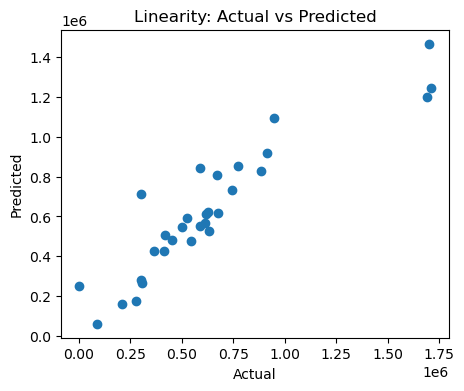

In [47]:
plt.figure(figsize=(5, 4))
plt.scatter(y_test, predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linearity: Actual vs Predicted")
plt.show()

Normality Assumption on the residuals 

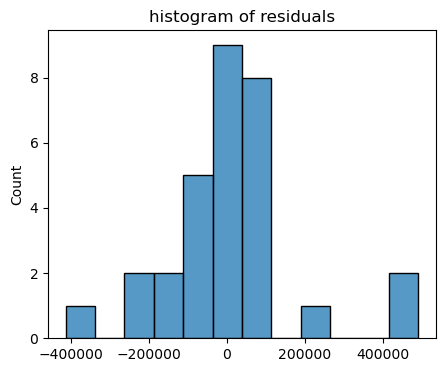

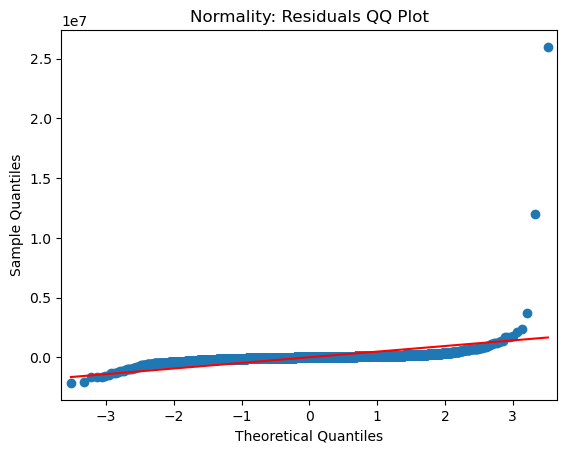

In [59]:

plt.figure(figsize=(5, 4))
sns.histplot(residual)
plt.title("histogram of residuals")
plt.show()

# Normality: QQ Plot
sm.qqplot(residuals, line='s')
plt.title("Normality: Residuals QQ Plot")
plt.show()

Independence & Homoscedasticity assumptions

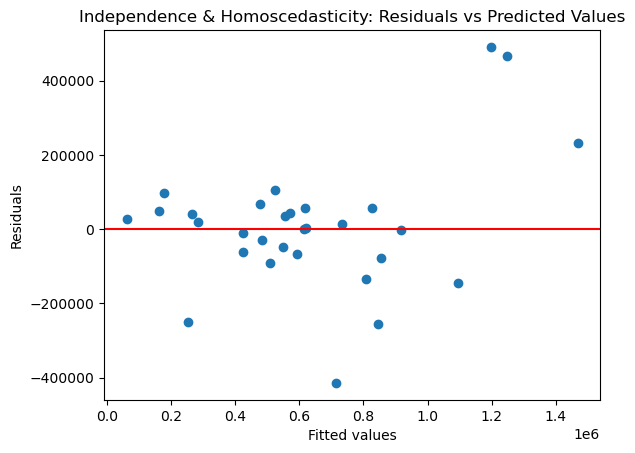

In [61]:
plt.scatter(predictions, residual)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Independence & Homoscedasticity: Residuals vs Predicted Values")
plt.show()

In [93]:
# Get the coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Combine coefficients and p-values into a DataFrame
coefficients_df = pd.DataFrame({'Coefficient': coefficients, 'P-value': p_values})

# Sort by largest coefficients
sorted_df = sorted_df.nlargest(50, 'Coefficient')

# Sort the coefficients by the smallest p-values 
sorted_df = coefficients_df.nsmallest(25, 'P-value')


print(sorted_df)


                      Coefficient       P-value
sqft_living            127.608642  4.283880e-38
sqft_above             115.089279  8.533239e-28
city_Medina         543135.767764  7.360798e-14
statezip_WA 98039   543135.767764  7.360798e-14
statezip_WA 98004   445301.211109  2.262222e-10
statezip_WA 98112   386725.061137  1.163340e-09
city_Mercer Island  155839.092869  1.075015e-07
statezip_WA 98040   155839.092869  1.075015e-07
statezip_WA 98199   331314.932905  2.217227e-07
statezip_WA 98031   304261.777125  3.176174e-07
waterfront          474940.434341  4.369894e-07
view                 50684.145516  4.166410e-06
statezip_WA 98109   381549.314776  2.977550e-05
statezip_WA 98119   297992.040152  4.365495e-05
statezip_WA 98105   264379.606043  3.066178e-04
statezip_WA 98178  -251959.020141  4.335566e-04
city_Renton        -123121.631988  6.112970e-04
floors              -66585.435720  9.864165e-04
statezip_WA 98038   -82117.151833  2.667535e-03
city_Maple Valley   -82117.151833  2.667

Data Overview

The dataset contains house prices and  features like bedrooms, bathrooms, floors etc. It has 17(features) columns and 4600 rows
which includes key numeric features: Price - the target variable that was predicted, Bedrooms, Bathrooms, 
Sqft_living - square footage of living space,Sqft_lot - square footage of land space and also categorical features: City, Statezip,
and Country

in exploratory Data Analysis, Price  was found to be right skewed, with most houses under one miliion. 

Feature Engineering:
Actual age of house was calculated from year built.
Age since last renovation was calculated.
Categorical features like city were encoded into dummy variables.

Model Building

Both Linear Regression, Lasso Regression and Ridge Regression were evaluated. but Linear Regression gave the best performance having 
the mean square error (MSE)  of 30538668342.9217.
the linear regression model was fitted, and validated using linear model assumptions.

Key Findings

sqft_living  and sqft_above  are the most important predictor of price.Location features like city (city_Medina)  , zipcode have high correlation to price.
Number of bedrooms also have a significant positive coefficient. Waterfront houses command higher prices. House condition, grade and view are also strong drivers.